# Machine Learning in Python - Logistic Regression Solution

In this section, we will look at the popular classification algorithm called Logistic Regression. 

Import the required packages

In [31]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Import the incomedata.csv dataset and load is as df. Display the first 10 rows of data.

In [32]:
df = pd.read_csv(r"C:\Users\julesd\OneDrive - Altron Karabina\Karabina\Demos and PoC's\MTN\Data Science Academy\Course Content\2. Silver\Datasets\incomedata.csv")

Create a heatmap to show the presence of nulls.

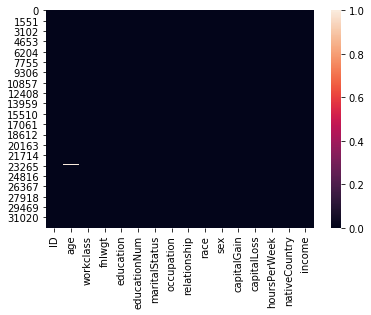

In [33]:
sns.heatmap(df.isnull())

There is only one null; we will simply remove this row from the dataset. Drop the null.

In [34]:
df.dropna(inplace = True)

Check the datatypes of the columns.

In [35]:
df.dtypes

ID                 int64
age              float64
workclass         object
fnlwgt             int64
education         object
educationNum       int64
maritalStatus     object
occupation        object
relationship      object
race              object
sex               object
capitalGain        int64
capitalLoss        int64
hoursPerWeek       int64
nativeCountry     object
income            object
dtype: object

All of the **object** type columns will have to be changed to categorical vaiables. Let us first create a list of the categorical columns. We will call this list **cat**.

In [36]:
cat = df.select_dtypes(include='object')

Create a countplot to show the income variation vs various dimensions, to get a feel for the dataset.

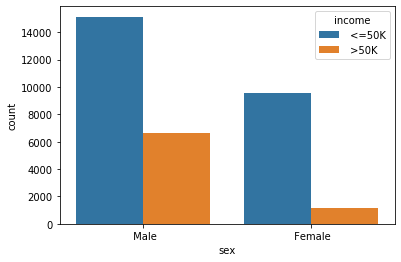

In [37]:
sns.countplot(x = 'sex', data = df, hue='income')

For each of the columns in out list **cat**, we will change those columns' data types to categorical. We will use a for loop to do this.

In [38]:
for col in df.select_dtypes(include='object'):
    df[col] = df[col].astype('category')

Check the data types of the columns.

In [39]:
df.dtypes

ID                  int64
age               float64
workclass        category
fnlwgt              int64
education        category
educationNum        int64
maritalStatus    category
occupation       category
relationship     category
race             category
sex              category
capitalGain         int64
capitalLoss         int64
hoursPerWeek        int64
nativeCountry    category
income           category
dtype: object

When a variable is saved as a categorical type, a dictionary is created in memory. This dictionary will have the value of  the categories in each column, with a key associated with each category.

Let us have a look at one of these dictionaries.

In [40]:
dict(enumerate(df['maritalStatus'].cat.categories))

{0: ' Divorced',
 1: ' Married-AF-spouse',
 2: ' Married-civ-spouse',
 3: ' Married-spouse-absent',
 4: ' Never-married',
 5: ' Separated',
 6: ' Widowed'}

In order for us to be able to make predictions on the test set, we need to be able to encode the categories of the test set data in exactly the same way as we did for the training set data. To do this, we need to save each of these dictionaries for each categorical column. We do this using a for loop.

In [41]:
d = {}
for col in df.select_dtypes(include='category'):
    d[col] = dict(enumerate(df[col].cat.categories))
    
print(d)

{'workclass': {0: ' ?', 1: ' Federal-gov', 2: ' Local-gov', 3: ' Never-worked', 4: ' Private', 5: ' Self-emp-inc', 6: ' Self-emp-not-inc', 7: ' State-gov', 8: ' Without-pay'}, 'education': {0: ' 10th', 1: ' 11th', 2: ' 12th', 3: ' 1st-4th', 4: ' 5th-6th', 5: ' 7th-8th', 6: ' 9th', 7: ' Assoc-acdm', 8: ' Assoc-voc', 9: ' Bachelors', 10: ' Doctorate', 11: ' HS-grad', 12: ' Masters', 13: ' Preschool', 14: ' Prof-school', 15: ' Some-college'}, 'maritalStatus': {0: ' Divorced', 1: ' Married-AF-spouse', 2: ' Married-civ-spouse', 3: ' Married-spouse-absent', 4: ' Never-married', 5: ' Separated', 6: ' Widowed'}, 'occupation': {0: ' ?', 1: ' Adm-clerical', 2: ' Armed-Forces', 3: ' Craft-repair', 4: ' Exec-managerial', 5: ' Farming-fishing', 6: ' Handlers-cleaners', 7: ' Machine-op-inspct', 8: ' Other-service', 9: ' Priv-house-serv', 10: ' Prof-specialty', 11: ' Protective-serv', 12: ' Sales', 13: ' Tech-support', 14: ' Transport-moving'}, 'relationship': {0: ' Husband', 1: ' Not-in-family', 2: 

With the columns' types set to categorical, and with the dictionaries saved, we can now encode each column in the dataset using the category encoding.

In [42]:
for col in df.select_dtypes(include='category'):
    df[col] = df[col].cat.codes
    
df

ID   age  workclass  fnlwgt  education  educationNum  \
0      100001  39.0          7   77516          9            13   
1      100002  50.0          6   83311          9            13   
2      100003  38.0          4  215646         11             9   
3      100004  53.0          4  234721          1             7   
4      100005  28.0          4  338409          9            13   
5      100006  37.0          4  284582         12            14   
6      100007  49.0          4  160187          6             5   
7      100008  52.0          6  209642         11             9   
8      100009  31.0          4   45781         12            14   
9      100010  42.0          4  159449          9            13   
10     100011  37.0          4  280464         15            10   
11     100012  30.0          7  141297          9            13   
12     100013  23.0          4  122272          9            13   
13     100014  32.0          4  205019          7            12   
14     100015  40.0          4  121772          8            11   
15     100016  34.0          4  245487          5             4   
16     100017  25.0          6  176756         11             9   
17     100018  32.0          4  186824         11             9   
18     100019  38.0          4   28887          1             7   
19     100020  43.0          6  292175         12            14   
20     100021  40.0          4  193524         10            16   
21     100022  54.0          4  302146         11             9   
22     100023  35.0          1   76845          6             5   
23     100024  43.0          4  117037          1             7   
24     100025  59.0          4  109015         11             9   
25     100026  56.0          2  216851          9            13   
26     100027  19.0          4  168294         11             9   
27     100028  54.0          0  180211         15            10   
28     100029  39.0          4  367260         11             9   
29     100030  49.0          4  193366         11             9   
...       ...   ...        ...     ...        ...           ...   
32531  132532  30.0          0   33811          9            13   
32532  132533  34.0          4  204461         10            16   
32533  132534  54.0          4  337992          9            13   
32534  132535  37.0          4  179137         15            10   
32535  132536  22.0          4  325033          2             8   
32536  132537  34.0          4  160216          9            13   
32537  132538  30.0          4  345898         11             9   
32538  132539  38.0          4  139180          9            13   
32539  132540  71.0          0  287372         10            16   
32540  132541  45.0          7  252208         11             9   
32541  132542  41.0          0  202822         11             9   
32542  132543  72.0          0  129912         11             9   
32543  132544  45.0          2  119199          7            12   
32544  132545  31.0          4  199655         12            14   
32545  132546  39.0          2  111499          7            12   
32546  132547  37.0          4  198216          7            12   
32547  132548  43.0          4  260761         11             9   
32548  132549  65.0          6   99359         14            15   
32549  132550  43.0          7  255835         15            10   
32550  132551  43.0          6   27242         15            10   
32551  132552  32.0          4   34066          0             6   
32552  132553  43.0          4   84661          8            11   
32553  132554  32.0          4  116138         12            14   
32554  132555  53.0          4  321865         12            14   
32555  132556  22.0          4  310152         15            10   
32556  132557  27.0          4  257302          7            12   
32557  132558  40.0          4  154374         11             9   
32558  132559  58.0          4  151910         11         

Notice how each column that used to contain a categorical value now contains a numeric value. 

As we are interested in the income column, let us set what its encoding was. Recall, we created a dictionary of dictionaries called **d**. 

In [43]:
d['income']

{0: ' <=50K', 1: ' >50K'}

The ID column is not needed for the machine learning process. Let us remove it.

In [44]:
df.drop('ID', inplace = True, axis = 1)

With our dataset prepared, we are now ready to import the Logistic Regression model from Scikit Learn. Import the package, and then create a model called **model**.

In [45]:
from sklearn.linear_model import LogisticRegression as lr
model = lr()

We can now define our target column, called **y**, and our attributes, called **x**.

In [46]:
x = df.drop('income', axis = 1)
y = df['income']

We need to split the datasets into a training and a test set. We do this using the train_test_split module from Scikit Learn.

In [47]:
from sklearn.model_selection import train_test_split as tts

Split the data using a test_size of 30% and a random state of 42.

In [48]:
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.3, random_state = 42)

Fit the model to the data.

In [49]:
model.fit(x_train, y_train)

C:\Users\julesd\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

We will now create a set of predicted results, and save it in a list called **pred**.

In [50]:
pred = model.predict(x_test)

We can get a sense of how well our model predicts by combining the test set attributes, the actual values and the predicted values.

In [51]:
x_test['pred'] = pred
x_test['income'] = y_test
x_test

C:\Users\julesd\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\julesd\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


age  workclass  fnlwgt  education  educationNum  maritalStatus  \
31543  32.0          6  420895          9            13              2   
12742  21.0          4  230429         11             9              4   
16480  35.0          4  172186         15            10              4   
9743   33.0          6  193246         11             9              4   
16774  38.0          4   31053         11             9              0   
30663  27.0          4   59068         11             9              2   
4643   59.0          4  381851          6             5              6   
1521   47.0          7  141483          6             5              0   
26154  68.0          4  148874          6             5              2   
16181  60.0          2   93272         11             9              2   
345    43.0          6  241895          9            13              4   
16674  21.0          4   32732         15            10              4   
3125   55.0          4  153484         12            14              2   
23205  29.0          7  240738         11             9              2   
26851  27.0          4   36851          9            13              4   
7047   59.0          5  107287          0             6              6   
14663  30.0          6  180859         15            10              4   
12763  20.0          4  282579         15            10              4   
23326  21.0          4  148444         15            10              4   
12063  49.0          4   80914          4             3              4   
15300  54.0          4  192862         11             9              0   
2267   32.0          2  286101         11             9              4   
19411  30.0          4  236993         15            10              4   
11789  26.0          4   57600          9            13              2   
29990  33.0          4   31449          7            12              0   
16529  23.0          4  170070          2             8              4   
26087  32.0          4  167990         11             9              2   
12355  41.0          6  169023          9            13              2   
8212   32.0          4   73621         15            10              0   
5118   32.0          4  209184          9            13              2   
...     ...        ...     ...        ...           ...            ...   
32183  44.0          5  138991         15            10              2   
20988  50.0          4  128478         11             9              2   
6604   41.0          4  406603         11             9              4   
7303   31.0          4  183778          9            13              4   
18648  31.0          4   84130         15            10              2   
20699  34.0          4  153326          9            13              2   
10128  17.0          4  186677          1             7              4   
14683  50.0          1   96657          9            13              0   
29757  19.0          7  135162         15            10              4   
2240   38.0          1  338320         14            15              2   
10912  33.0          4  183612         11             9              2   
17750  24.0          0  376474         11             9              2   
7421   22.0          7  292933          9            13              4   
8119   34.0          6  312197         11             9              2   
21453  34.0          0  170276          9            13              2   
29842  35.0          0  374716          6             5              2   
27249  28.0          4   51961         15            10              4   
9536   52.0          0  105428         15            10              2   
18212  20.0          4   88231         15            10              4   
12458  60.0          4  140544         11             9              4   
13614  22.0          4  406978          9            13              4   
32255  19.0          4   57145         11             9              4   
24202  29.0 

To get a better sense of how our model is performing, we will use the **metrics** package from Scikit Learn

In [52]:
from sklearn import metrics

Let uslook at the confusion matrix for the model.

In [53]:
print(metrics.confusion_matrix(y_test, pred))

[[7091  364]
 [1648  660]]


Let us look at the Accuracy, Precision and Recall.

In [27]:
print("Accuracy:", str(round(metrics.accuracy_score(y_test, pred) * 100, 2)), "%")
print("Precision:", str(round(metrics.precision_score(y_test, pred) * 100, 2)), "%")
print("Recall:", str(round(metrics.recall_score(y_test, pred) * 100, 2)), "%")


Accuracy: 79.39 %
Precision: 64.45 %
Recall: 28.6 %


We can see that there is some improvements that can be done here. We will leave that to you as an exercise to see if you can improve the model.